# HR_Attrition_Rate Project

Project Description...

Age= Employee's age

Gender= Employee's Gender

BusinessTravel= Frequency of employees' business trips

DailyRate= Daily salary rate for employees

Department= Office of employees

DistanceFromHome= Distance from home in miles to work

Education= Level of education achieved by staff

EducationField= Employee's field of study

EmployeeCount= Total number of employees in the organization

EmployeeNumber= A unique identifier for each employee record

EnvironmentSatisfaction= Employee satisfaction with their working environment

HourlyRate= Hourly rate for employees

JobInvolvement= Level of involvement required for the employee's job

JobLevel= Employee's level of work

JobRole= The role of employees in the organization

JobSatisfaction= Employee satisfaction with their work

MaritalStatus= Employee's marital status

MonthlyIncome= Employee's monthly income

MonthlyRate= Monthly salary rate for employees

NumCompaniesWorked= Number of companies the employee worked for

Over18= Whether the employee is over 18 years old

OverTime= Do employees work overtime

PercentSalaryHike= Salary increase rate for employees

PerformanceRating= The performance rating of the employee

RelationshipSatisfaction= Employee satisfaction with their relationships

StandardHours= Standard working hours for employees

StockOptionLevel= Employee stock option level

TotalWorkingYears= Total number of years the employee has worked

TrainingTimesLastYear= Number of times employees were taken to training in the last year

WorkLifeBalance= Employees' perception of their work-life balance

YearsAtCompany= Number of years employees have been with the company

YearsInCurrentRole= Number of years the employee has been in their current role

YearsSinceLastPromotion= Number of years since employee's last promotion

YearsWithCurrManager= Number of years an employee has been with their current manager

Attrition= Does the employee leave the organization

### Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import os

### Load dataset 

In [2]:
hr=pd.read_csv('HR-Employee-Attrition.csv')
hr

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
hr.sample(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
1058   34       Yes      Travel_Rarely        790                   Sales   
150    40        No  Travel_Frequently       1395  Research & Development   
205    29       Yes      Travel_Rarely        121                   Sales   
120    30        No  Travel_Frequently       1312  Research & Development   
136    51       Yes  Travel_Frequently       1150  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1058                24          4        Medical              1   
150                 26          3        Medical              1   
205                 27          3      Marketing              1   
120                 23          3  Life Sciences              1   
136                  8          4  Life Sciences              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1058            1489  ...                         3            80   
150              202  ...                         1            80   
205              283  ...                         4            80   
120              159  ...                         3            80   
136              179  ...                         4            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1058                 0                 16                      2   
150                  1                 20                      2   
205                  3                 10                      3   
120                  3                 10                      2   
136                  0                 18                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1058               4              15                  9   
150                3              20                  7   
205                2              10                  4   
120                2              10                  7   
136                3               4                  2   

      YearsSinceLastPromotion  YearsWithCurrManager  
1058                       10                    10  
150                         2                    13  
205                         1                     9  
120                         0                     9  
136                         0                     3  

[5 rows x 35 columns]

### Data processing 

In [4]:
print(hr.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

OBSERVATIONS-_-_-

There are 34 features and 1 is target variable. This dataset contains 1470 different persons information. Out of 34 columns 9 features are objects and rest are numbers

In [6]:
hr.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
hr.duplicated().sum()

0

#### OBSERVATIONS ****

There is no any null value and also not duplicated values

In [8]:
hr.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [9]:
# separate numerical and categorical columns
cat = hr.select_dtypes(['object']).columns
num = hr.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [10]:
hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
for i in cat:
    print('Unique values of ', i, set(hr[i]))

Unique values of  Attrition {'Yes', 'No'}
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
Unique values of  Department {'Human Resources', 'Sales', 'Research & Development'}
Unique values of  EducationField {'Technical Degree', 'Human Resources', 'Life Sciences', 'Medical', 'Other', 'Marketing'}
Unique values of  Gender {'Male', 'Female'}
Unique values of  JobRole {'Human Resources', 'Sales Executive', 'Laboratory Technician', 'Manufacturing Director', 'Research Scientist', 'Manager', 'Research Director', 'Sales Representative', 'Healthcare Representative'}
Unique values of  MaritalStatus {'Divorced', 'Married', 'Single'}
Unique values of  Over18 {'Y'}
Unique values of  OverTime {'Yes', 'No'}


## EDA

In [12]:
#how attrition affected by gender

attrition_yes = hr.query("Attrition == 'Yes'")

In [13]:
 fig=px.histogram(attrition_yes, x = attrition_yes['Gender'],title = 'Attrition Gender', text_auto = 'd3-format')
fig.show()

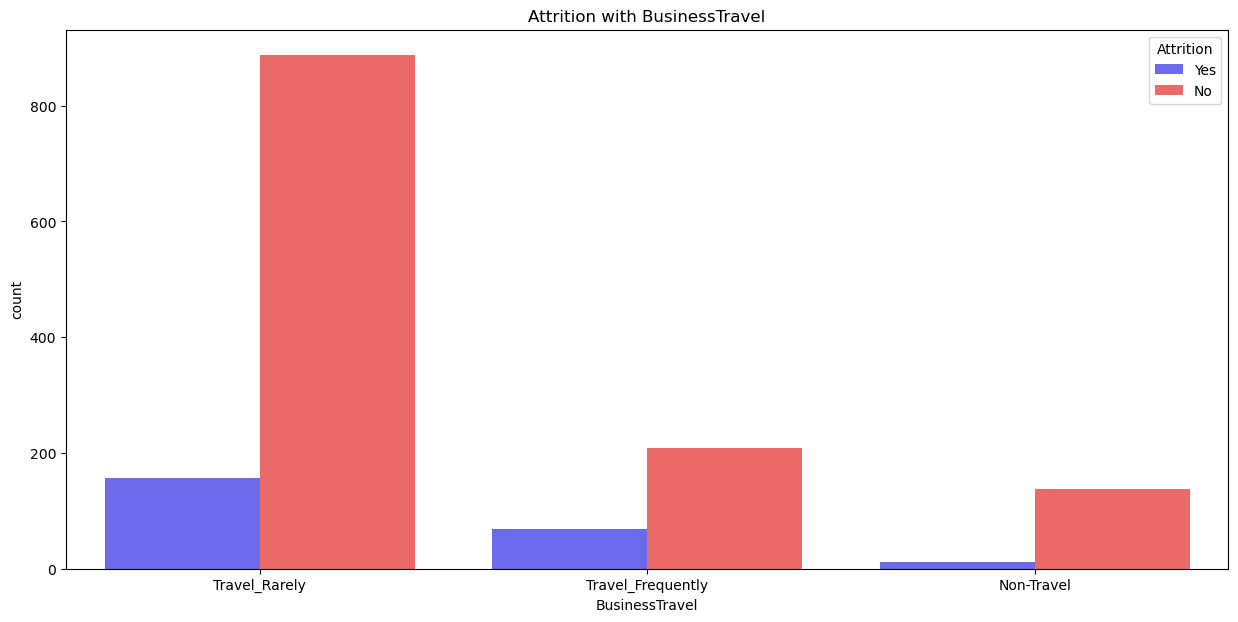

In [14]:
# Attrition affected by business travel
plt.figure(figsize=(15,7))
sns.countplot(x='BusinessTravel', hue='Attrition', data=hr, palette='seismic')
plt.title("Attrition with BusinessTravel")
plt.show()

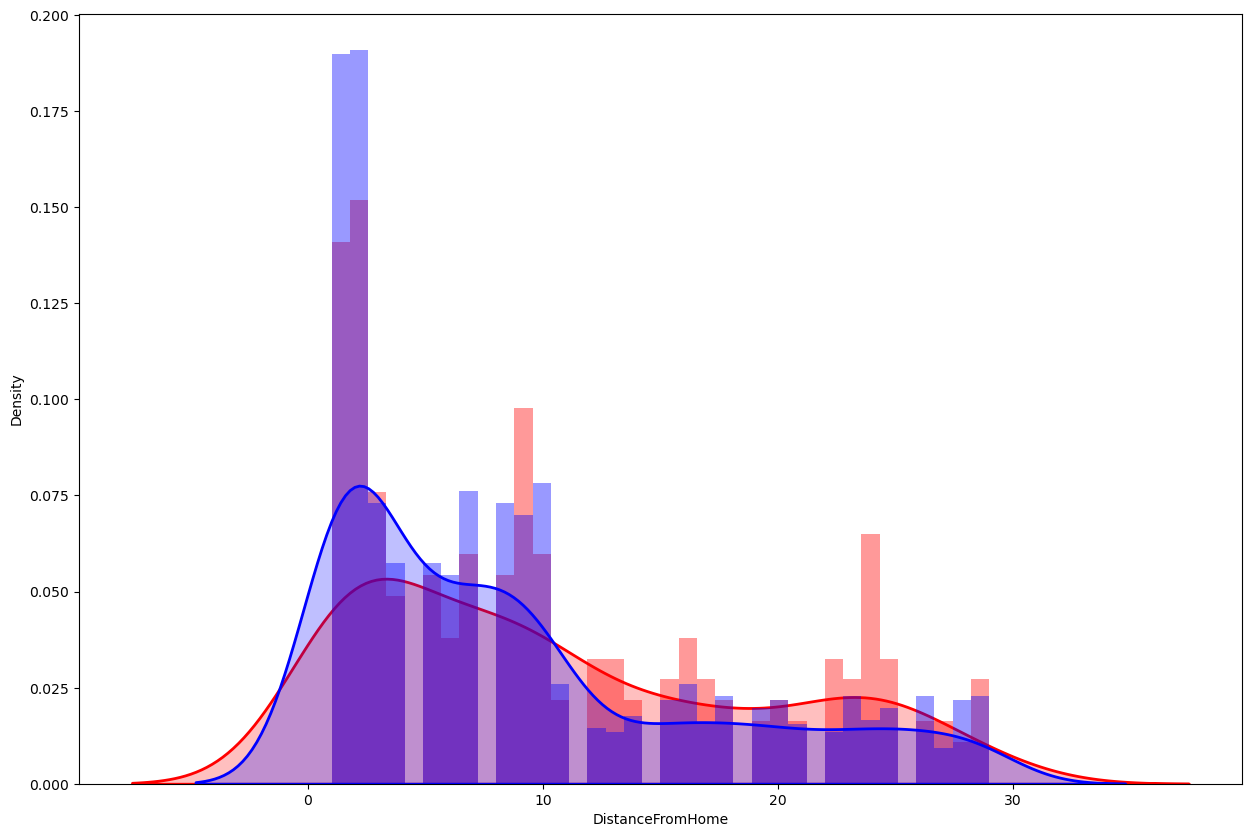

In [15]:
#Effect of distance from home on attrition

yes_attrition = (hr[hr['Attrition']=='Yes']).copy()
no_attrition = (hr[hr['Attrition']=='No']).copy()
plt.figure(figsize=(15,10))
sns.distplot(yes_attrition['DistanceFromHome'], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Left the Organization")

sns.distplot(no_attrition['DistanceFromHome'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',  
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Stayed back organization")

plt.show()


<Axes: title={'center': 'Attrition with Department'}, xlabel='Department', ylabel='count'>

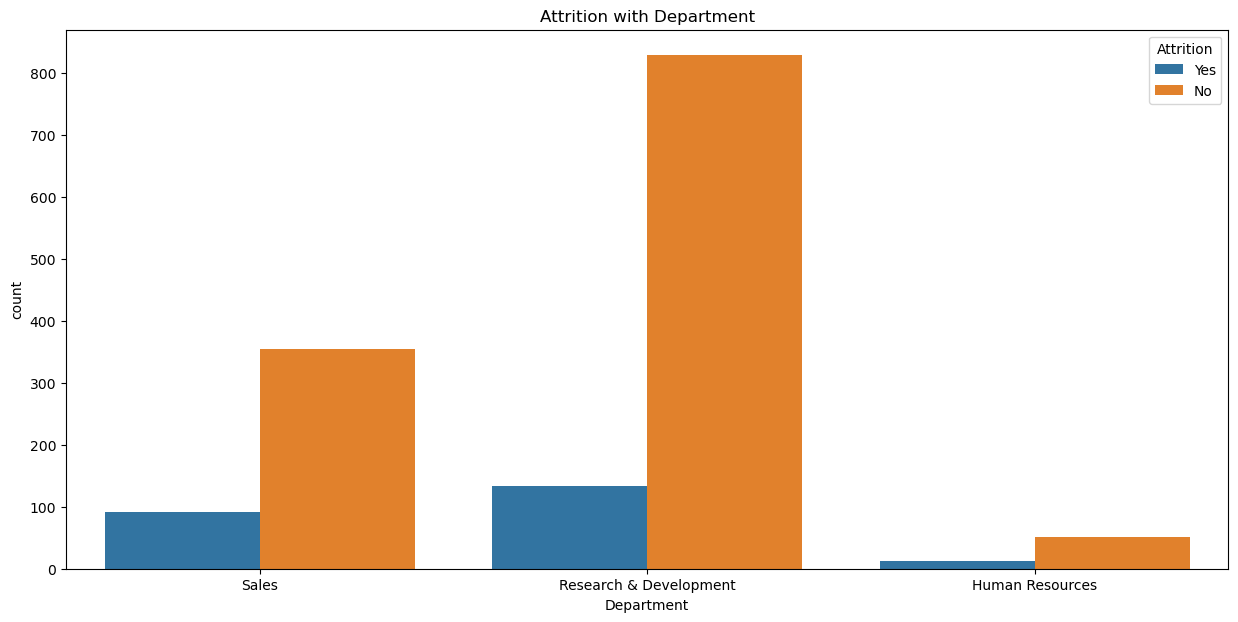

In [16]:
# Impact of department work on attrition

plt.figure(figsize=(15,7))
plt.title("Attrition with Department")
sns.countplot(x='Department', hue='Attrition', data=hr)

<Axes: xlabel='Age', ylabel='Density'>

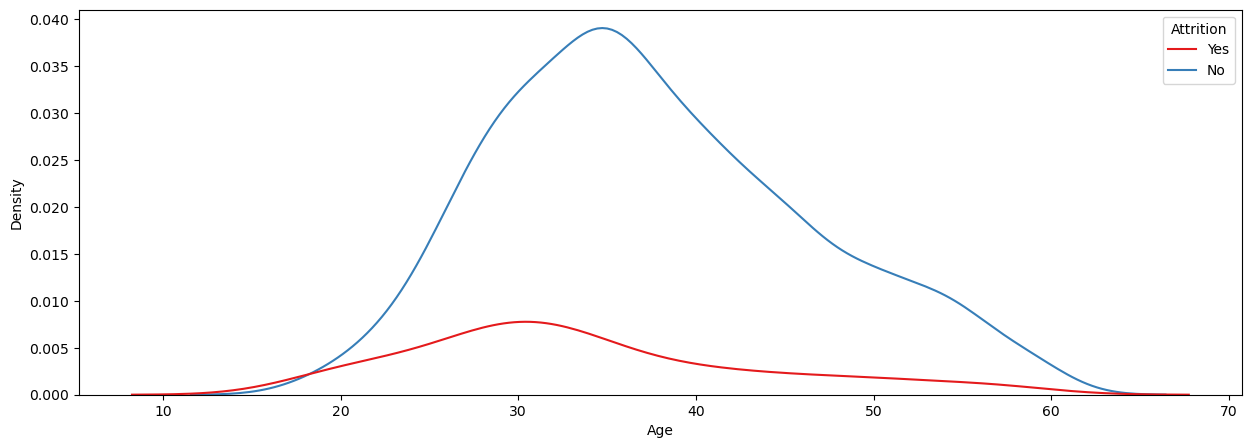

In [17]:
#Effect of years with current manager 

plt.figure(figsize=(15,5))

sns.kdeplot(data=hr, x = "Age", hue="Attrition",palette='Set1')

In [18]:
# Most job role of attrition

fig = px.histogram(attrition_yes, x = attrition_yes['JobRole'], template = 'plotly_dark',title = 'Attrition * JobRole', text_auto = 'd3-format')
fig.show()

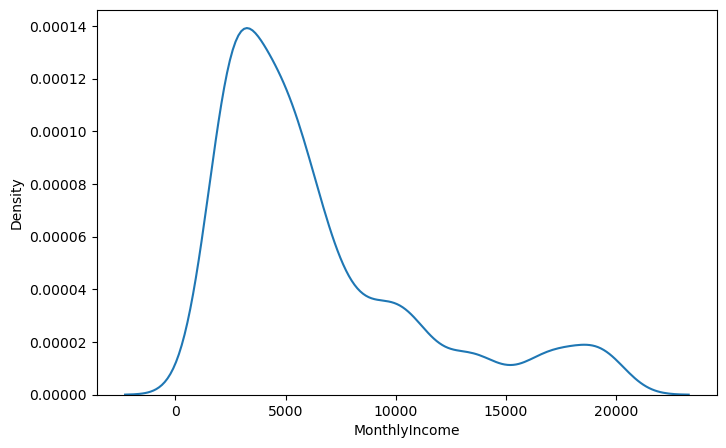

In [19]:
# How much does income matter

plt.figure(figsize=(8,5))
sns.distplot(hr['MonthlyIncome'], hist=False)
plt.show()

In [20]:
hr['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

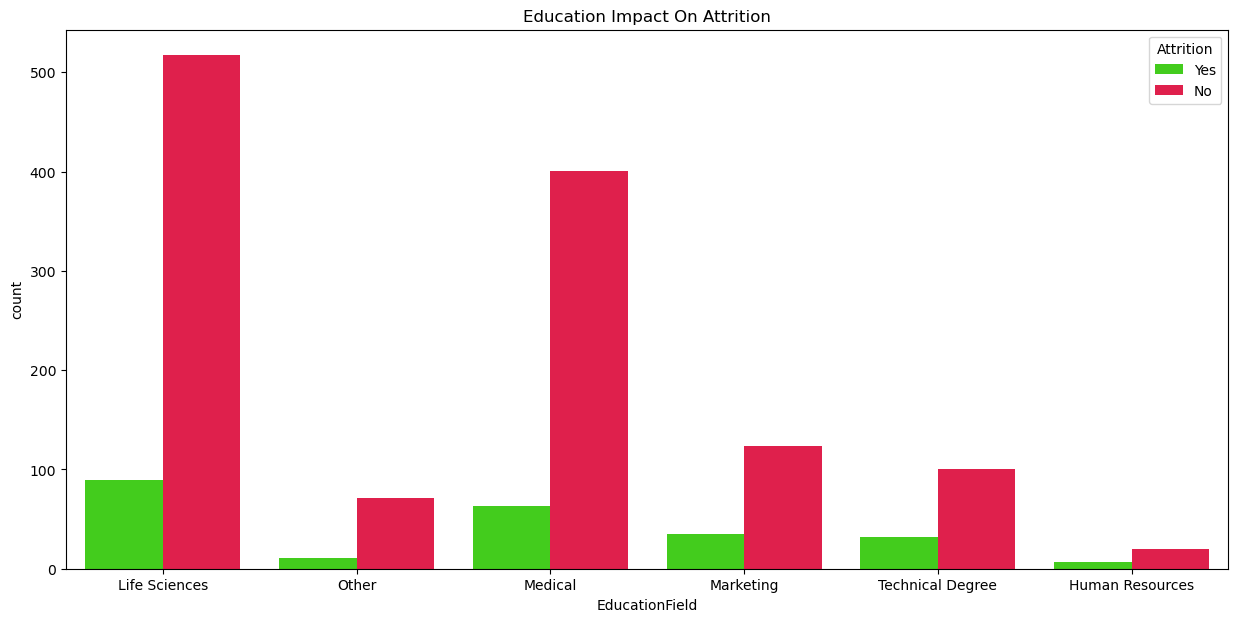

In [21]:
# Effect of education field

plt.figure(figsize=(15,7))
sns.countplot(x=hr['EducationField'], hue='Attrition', data=hr, palette='prism')
plt.title("Education Impact On Attrition")
plt.show()

In [22]:
# Over time stress
hr['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

<Axes: ylabel='count'>

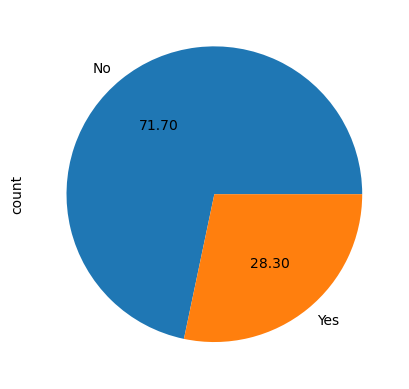

In [23]:
hr['OverTime'].value_counts().plot(kind='pie',autopct='%.2f')

In [24]:
# total working years on attrition
hr['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

<Axes: ylabel='count'>

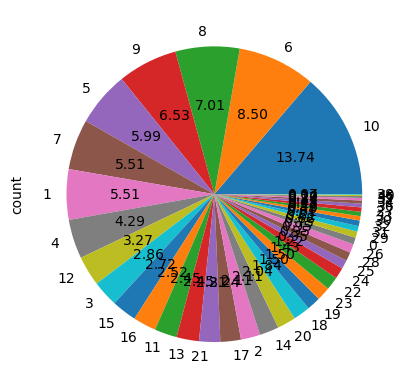

In [25]:
hr['TotalWorkingYears'].value_counts().plot(kind='pie',autopct='%.2f')

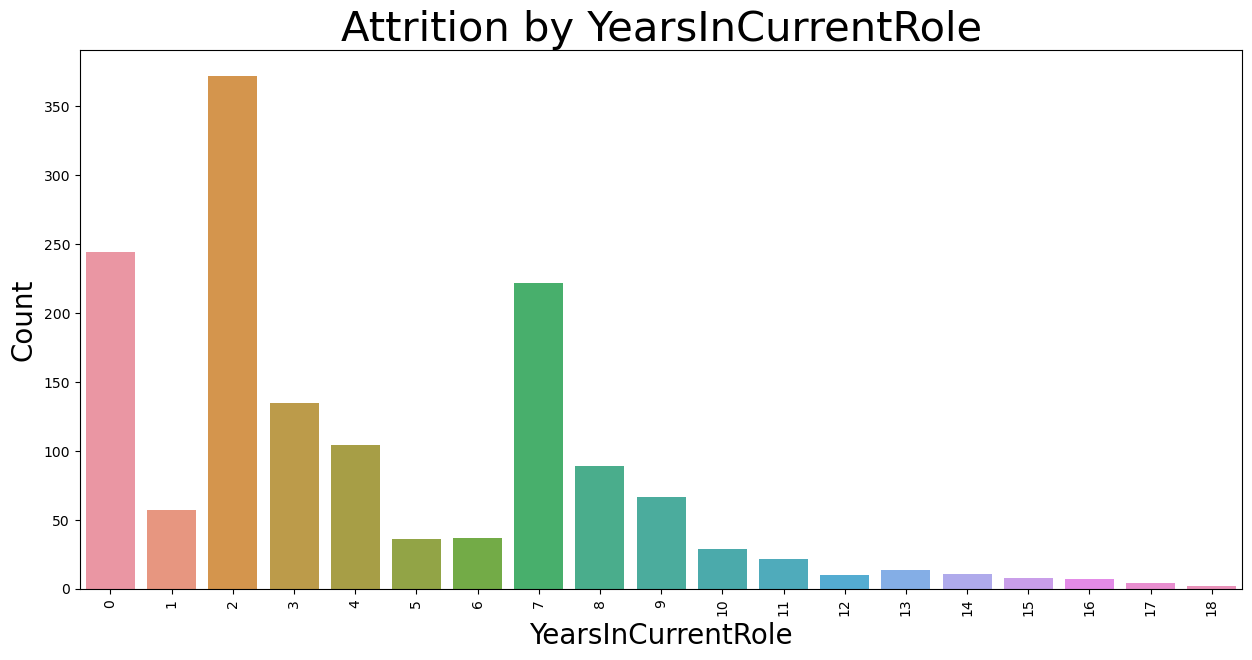

In [26]:
# does work duration in current role impact Attrition?
plt.figure(figsize=(15,7))
sns.countplot(x="YearsInCurrentRole", data=hr)
plt.xticks(rotation='vertical')
plt.title('Attrition by YearsInCurrentRole', fontsize=30)
plt.ylabel('Count', fontsize=20)
plt.xlabel('YearsInCurrentRole', fontsize=20)
plt.show()

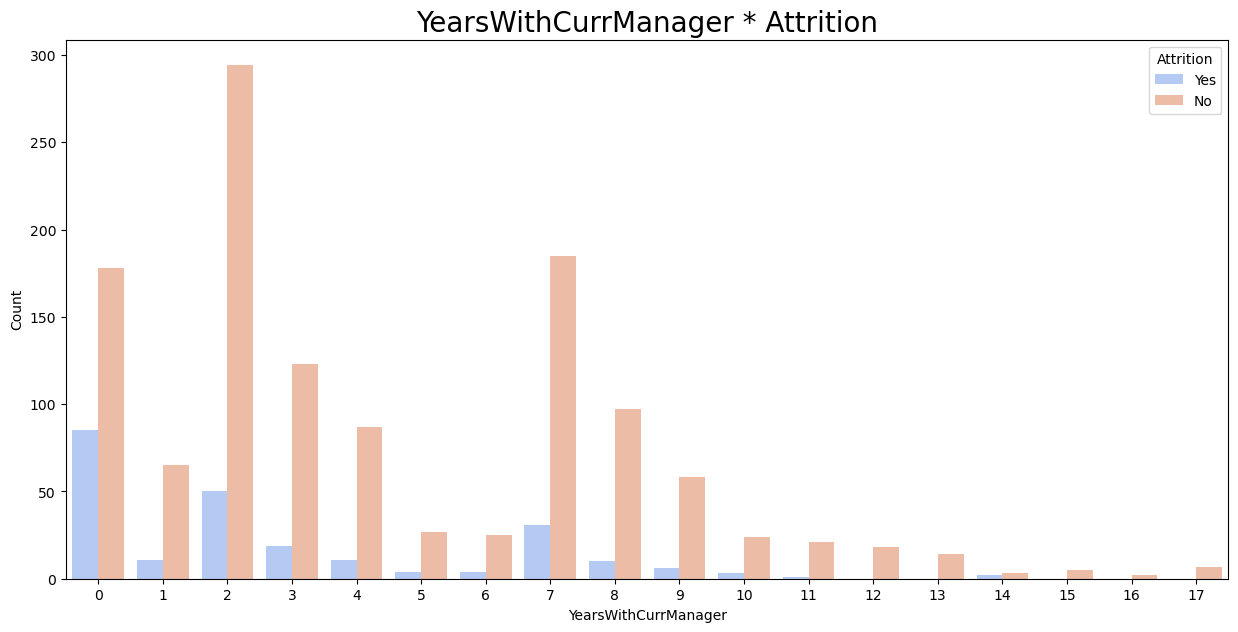

In [27]:
#Are managers a reason of people resigning ?
plt.figure(figsize=(15,7))
sns.countplot(x=hr['YearsWithCurrManager'], hue='Attrition', data=hr, palette="coolwarm")
plt.title('YearsWithCurrManager * Attrition', fontsize=20)
plt.ylabel('Count', fontsize=10)
plt.xlabel('YearsWithCurrManager', fontsize=10)
plt.show()

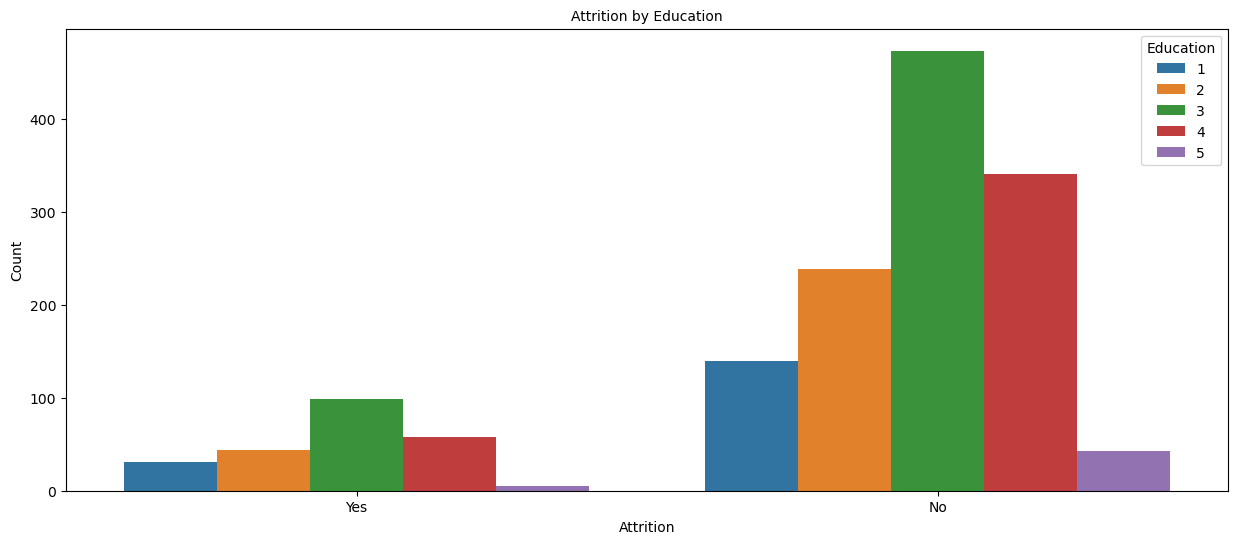

In [28]:
#are Educated people more likely to leave?
plt.figure(figsize=(15,6))
sns.countplot(x=hr['Attrition'], hue='Education', data=hr)
plt.title('Attrition by Education', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Attrition', fontsize=10)
plt.show()

In [29]:
# Which job role more likely to leave

plt.figure(figsize=(15,6))

fig = px.bar(data_frame=hr, y='EducationField',color='Attrition',
             title='Attrition by Job Role',
             labels={'EducationField': 'EducationField', 'Attrition': 'Attrition'},
             category_orders={"EducationField": hr["EducationField"].value_counts().index.tolist()})

fig.show()

<Figure size 1500x600 with 0 Axes>

# Observations -^_^-

In the field of job role Life Science has more Attrition rate than others and second position is Medical,the least attrition rate is in Human Resources.
2.In education the Graduated are more likely leave the job.

3.Salary of the month We found that employees with salaries of less than 5K are the most likely to leave their jobs.

4.With work enviroment most of the employees leave their jobs when they are not comfortable in their work space.

5.overtime when employees puted in stress and overtime, more than 30% leave the company

6.The maximum attrition range in Age is 18-44.

7.According to the chart, the more years of work (experience) the lower number of attrition (inverse relationship)

8.There is attrition along the range of YearsInCurrentRole from minimum(0 years) to maximum(18 years).

9.The real reason people quit their jobs is because the managers charged with ensuring their employees' success don't care enough to meet their needs as valued employees and human beings

10.The analysis displays the attrition rate by department according to this we can see that "Research & Development" have the most attrition problem

11.Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.

12.As income increases, attrition decreases.

13.Men with the position of sales expert have a lot of attrition.

14.Attrition is the highest for those in level 1 jobs.

In [30]:
hr2=hr.copy()
label=LabelEncoder()
for x in hr2.select_dtypes(include='object').columns:
    hr2[x]=label.fit_transform(hr2[x])
hr2.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 35 columns]

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
Over18                         NaN        NaN             NaN        NaN   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.0144

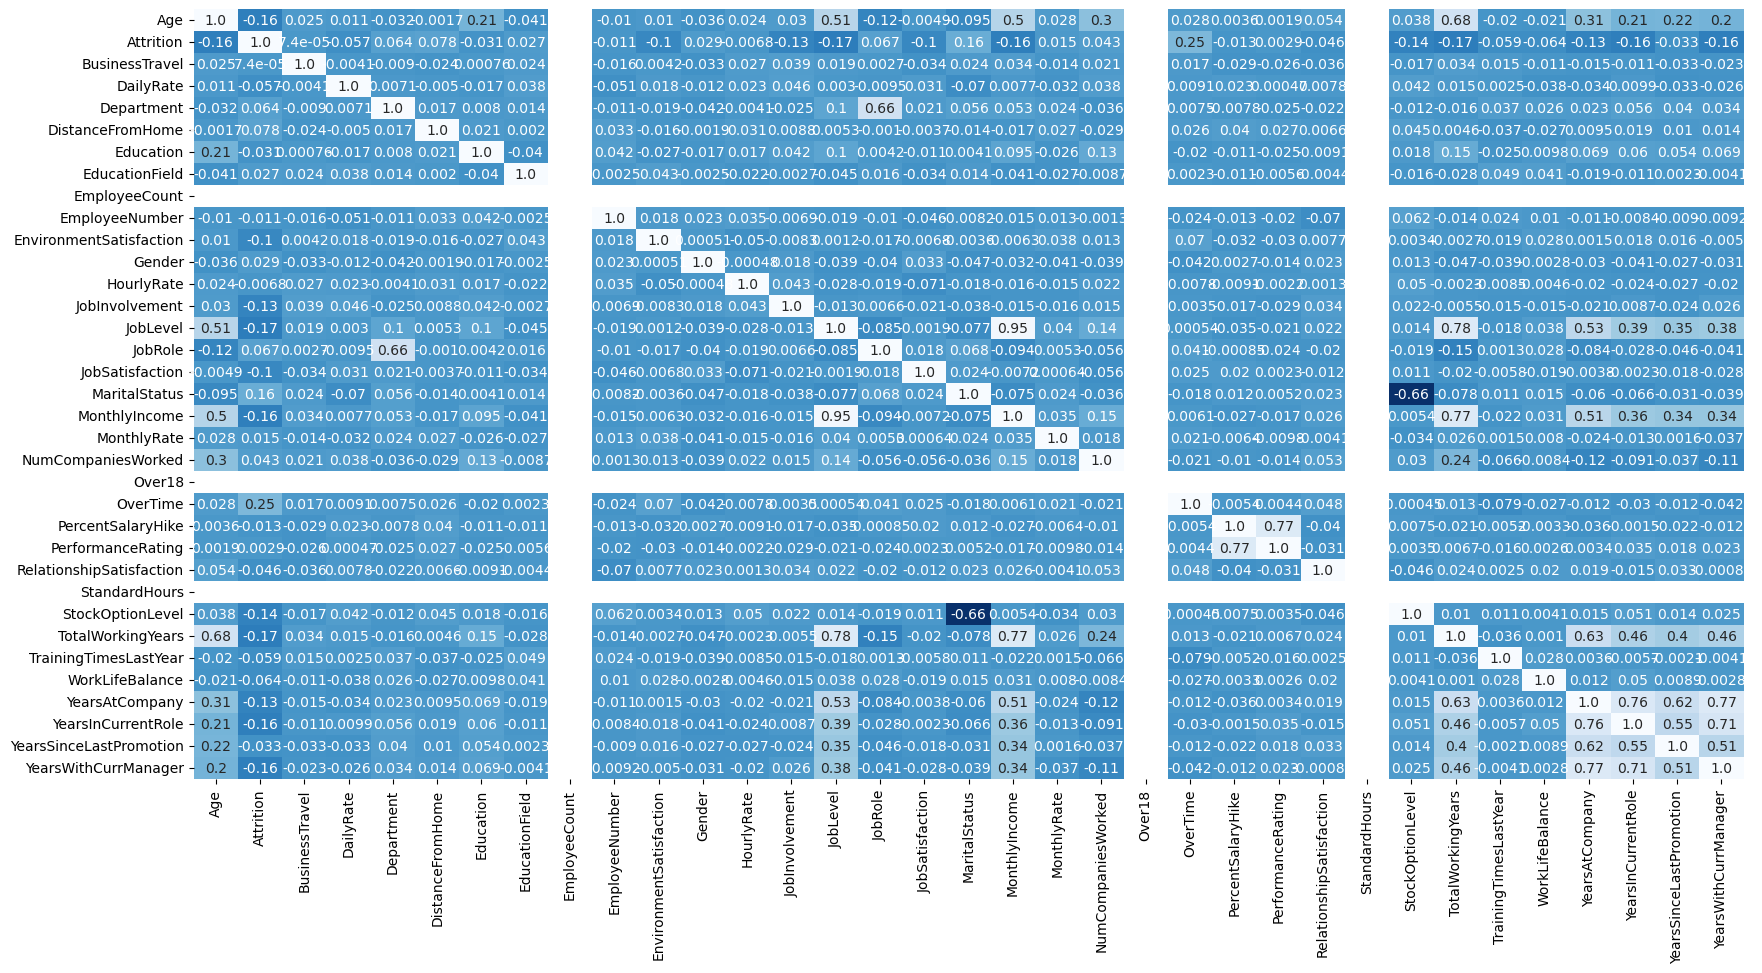

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(hr2.corr(),annot=True,fmt='.2',cbar=False,cmap='Blues_r')
hr2.corr()

In [32]:
X=hr2.drop('Attrition',axis=1)
y=hr2['Attrition']
key=X.keys()
X.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0               1              1               1                        2   
1               1              1               2                        3   
2               4              1               4                        4   
3               1              1               5                        4   
4               3              1               7                        1   

   ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  ...                         1             80                 0   
1  ...                         4             80                 1   
2  ...                         2             80                 0   
3  ...                         3             80                 0   
4  ...                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 34 columns]

In [33]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [34]:
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1972, 34)
X_test shape is  (494, 34)
y_train shape is  (1972,)
y_test shape is  (494,)


In [36]:
random_pip=Pipeline([
                    ('min_max',MinMaxScaler()),
                    ('model',RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=10,random_state=44))
                    ])
random_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=44))])

In [37]:
print('RandomForestClassifierModel Train Score is : ' ,random_pip.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' ,random_pip.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.994421906693712
RandomForestClassifierModel Test Score is :  0.8785425101214575


In [38]:
log_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',LogisticRegression(penalty='l2',solver='sag',C=2.0,random_state=44))
                    ])
log_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2.0, random_state=44, solver='sag'))])

In [39]:
print('LogisticRegressionModel Train Score is : ' , log_pip.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' ,log_pip.score(X_test, y_test))

LogisticRegressionModel Train Score is :  0.8351926977687627
LogisticRegressionModel Test Score is :  0.8299595141700404


In [40]:
knn_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',KNeighborsClassifier(n_neighbors=9,weights ='uniform',algorithm='auto'))
                    ])
knn_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model', KNeighborsClassifier(n_neighbors=9))])

In [41]:
print('KNNClassifierModel Train Score is : ' , knn_pip.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' ,knn_pip.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.829107505070994
KNNClassifierModel Test Score is :  0.7874493927125507


In [42]:
tree_pip=Pipeline([
                  ('min_max',MinMaxScaler()),
                  ('model',DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=44))
                    ])
tree_pip.fit(X_train,y_train)

Pipeline(steps=[('min_max', MinMaxScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        random_state=44))])

In [43]:
print('DecisionTreeClassifierModel Train Score is : ' , tree_pip.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , tree_pip.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.9518255578093306
DecisionTreeClassifierModel Test Score is :  0.771255060728745
